In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

pd.options.display.float_format = '{:.4f}'.format
from sklearn.model_selection import train_test_split

#### 01.Getting Data

In [2]:
data = pd.read_csv('Car_Purchasing_Data.csv')

In [3]:
data

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.0930,11609.3809,238961.2505,35321.4588
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.8929,9572.9571,530973.9078,45115.5257
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.5511,11160.3551,638467.1773,42925.7092
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.0380,14426.1648,548599.0524,67422.3631
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.1513,5358.7122,560304.0671,55915.4625
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.4029,6995.9025,541670.1016,48901.4434
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.4979,12301.4568,360419.0988,31491.4146
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.7780,10611.6069,764531.3203,64147.2889
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.9906,14013.0345,337826.6382,45442.1535


#### 02.Cleaning/Wrangling/EDA

In [32]:
data.shape

(500, 9)

In [33]:
data.columns

Index(['customer_name', 'customer_e-mail', 'country', 'gender', 'age',
       'annual_salary', 'credit_card_debt', 'net_worth',
       'car_purchase_amount'],
      dtype='object')

In [34]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]   # lower and replace
data.columns

Index(['customer_name', 'customer_e-mail', 'country', 'gender', 'age',
       'annual_salary', 'credit_card_debt', 'net_worth',
       'car_purchase_amount'],
      dtype='object')

In [35]:
data.describe()

,gender,age,annual_salary,credit_card_debt,net_worth,car_purchase_amount
count,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000
mean,0.5060,46.2240,62127.2396,9607.6450,431475.7136,44209.7992
std,0.5005,7.9903,11703.3782,3489.1880,173536.7563,10773.1787
min,0.0000,20.0000,20000.0000,100.0000,20000.0000,9000.0000
25%,0.0000,41.0000,54391.9772,7397.5158,299824.1959,37629.8960
50%,1.0000,46.0000,62915.4970,9655.0356,426750.1206,43997.7834
75%,1.0000,52.0000,70117.8620,11798.8675,557324.4787,51254.7095
max,1.0000,70.0000,100000.0000,20000.0000,1000000.0000,80000.0000


In [38]:
data.head()

,customer_name,customer_e-mail,country,gender,age,annual_salary,credit_card_debt,net_worth,car_purchase_amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.0930,11609.3809,238961.2505,35321.4588
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.8929,9572.9571,530973.9078,45115.5257
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.5511,11160.3551,638467.1773,42925.7092
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.0380,14426.1648,548599.0524,67422.3631
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.1513,5358.7122,560304.0671,55915.4625


#### Deal with NANs

In [36]:
data.isna().sum()

customer_name          0
customer_e-mail        0
country                0
gender                 0
age                    0
annual_salary          0
credit_card_debt       0
net_worth              0
car_purchase_amount    0
dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_name        500 non-null    object 
 1   customer_e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    int64  
 5   annual_salary        500 non-null    float64
 6   credit_card_debt     500 non-null    float64
 7   net_worth            500 non-null    float64
 8   car_purchase_amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


#### Drop irrelevant variables

In [39]:
new_data = data.drop(['customer_name','customer_e-mail','country'], axis = 1)

In [40]:
new_data

,gender,age,annual_salary,credit_card_debt,net_worth,car_purchase_amount
0,0,42,62812.0930,11609.3809,238961.2505,35321.4588
1,0,41,66646.8929,9572.9571,530973.9078,45115.5257
2,1,43,53798.5511,11160.3551,638467.1773,42925.7092
3,1,58,79370.0380,14426.1648,548599.0524,67422.3631
4,1,57,59729.1513,5358.7122,560304.0671,55915.4625
...,...,...,...,...,...,...
495,0,41,71942.4029,6995.9025,541670.1016,48901.4434
496,1,38,56039.4979,12301.4568,360419.0988,31491.4146
497,1,54,68888.7780,10611.6069,764531.3203,64147.2889
498,1,59,49811.9906,14013.0345,337826.6382,45442.1535


#### Data Exploration

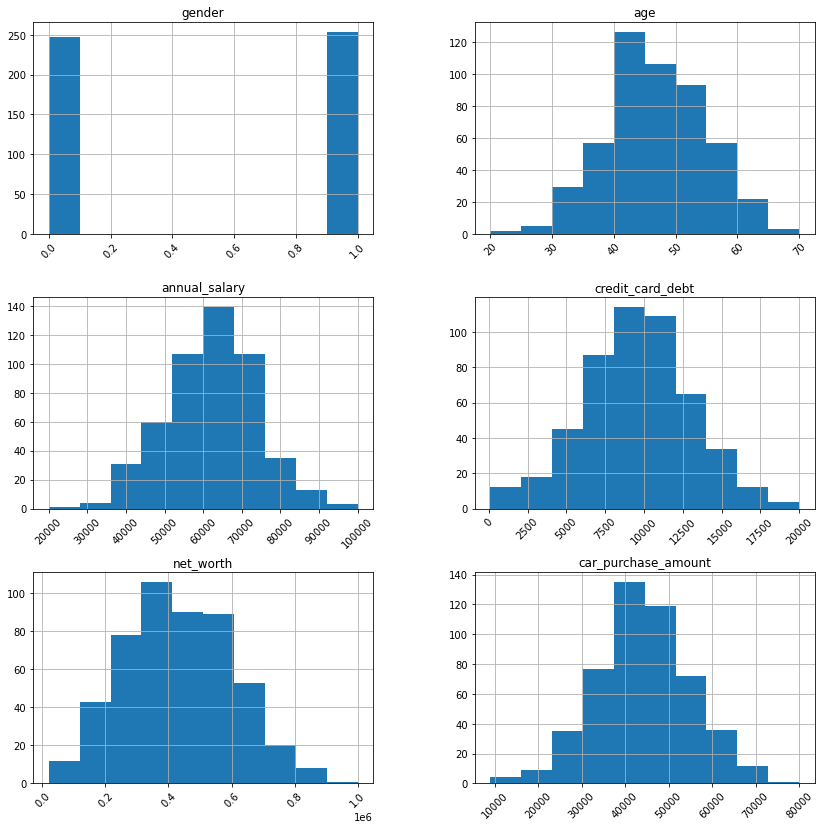

In [46]:
new_data.hist(figsize=(14,14), xrot=45)
plt.show()

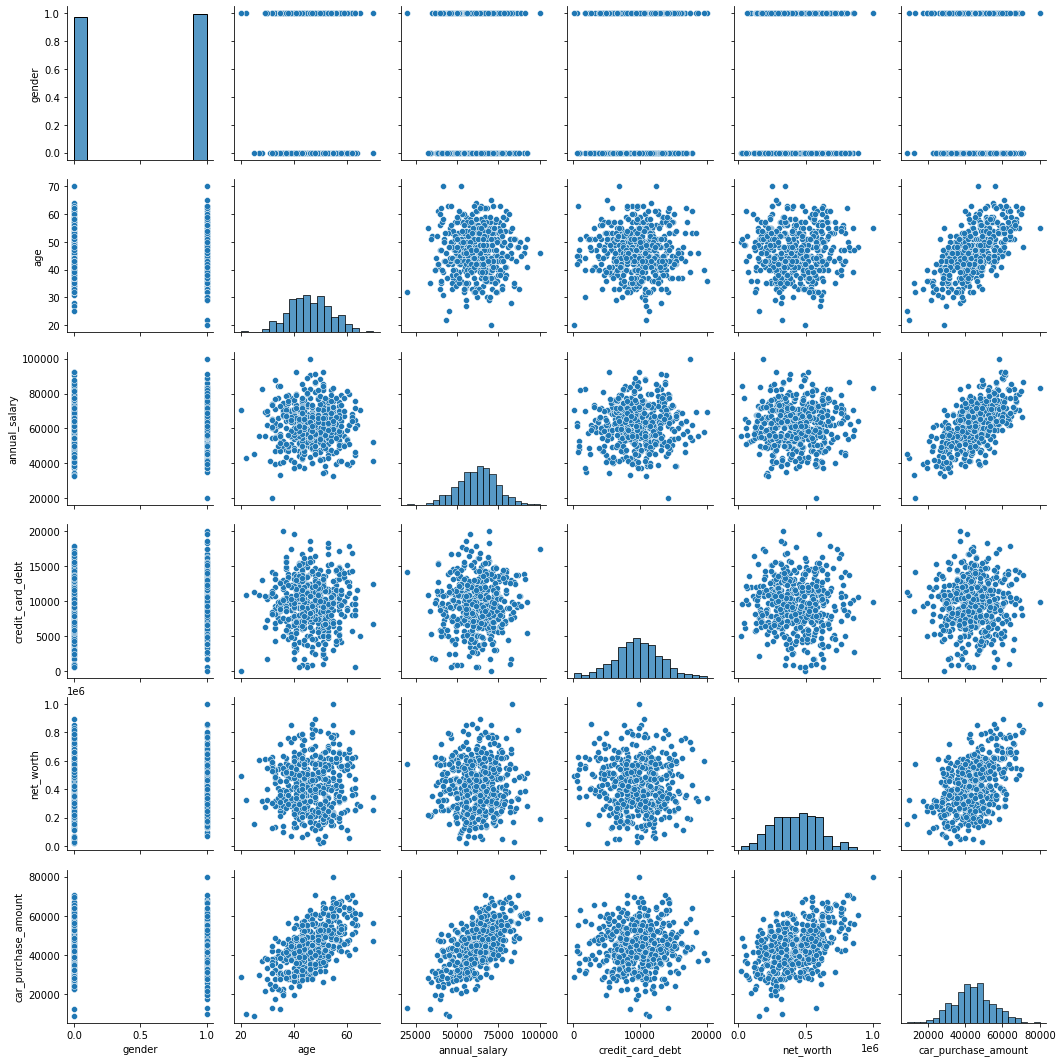

In [47]:
sns.pairplot(new_data)

#### Gender feature revealed that it is categorical column

#### Visualization of dependent variable and independent variables

In [52]:
new_data['gender'].value_counts()

1    253
0    247
Name: gender, dtype: int64

In [65]:
female = new_data[new_data.gender==0].shape[0]
male = new_data[new_data.gender== 1].shape[0]

#### Female car purchases

In [66]:
(female/(female+male)*100,'% car_purchase_amount.')

(49.4, '% car_purchase_amount.')

#### Male car purchases

In [67]:
(male/(male+female)*100,'% car_purchase_amount.')

(50.6, '% car_purchase_amount.')

#### visualization

<AxesSubplot:xlabel='gender', ylabel='count'>

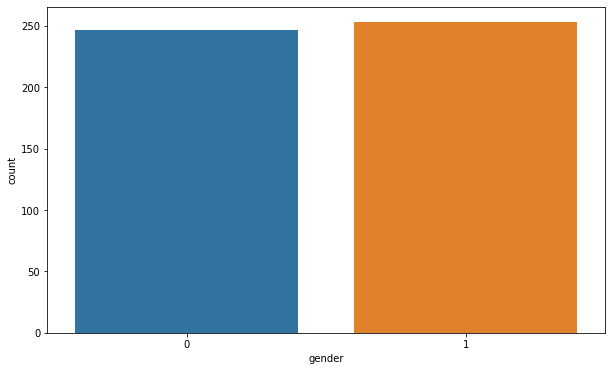

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(new_data['gender'])

#### Correlation

In [73]:
new_data.corr()

,gender,age,annual_salary,credit_card_debt,net_worth,car_purchase_amount
gender,1.0000,-0.0665,-0.0365,0.0242,-0.0084,-0.0664
age,-0.0665,1.0000,0.0004,0.0317,0.0218,0.6333
annual_salary,-0.0365,0.0004,1.0000,0.0496,0.0148,0.6179
credit_card_debt,0.0242,0.0317,0.0496,1.0000,-0.0494,0.0289
net_worth,-0.0084,0.0218,0.0148,-0.0494,1.0000,0.4886
car_purchase_amount,-0.0664,0.6333,0.6179,0.0289,0.4886,1.0000


In [74]:
corr = new_data.corr()

<AxesSubplot:>

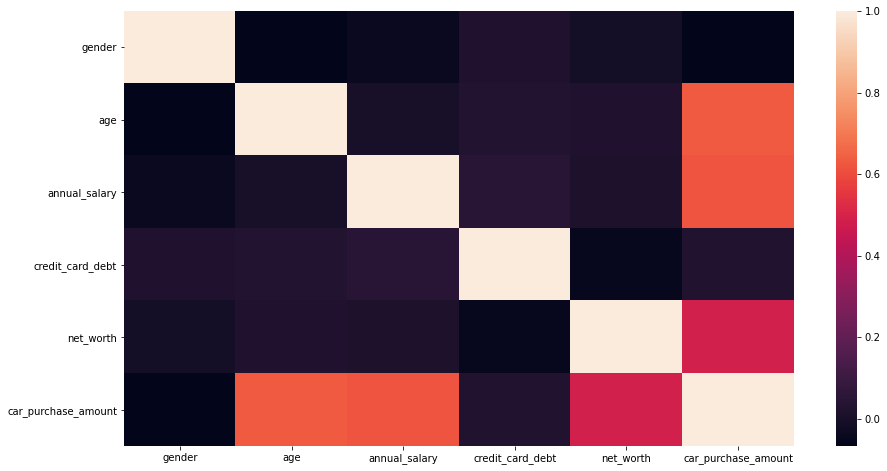

In [75]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

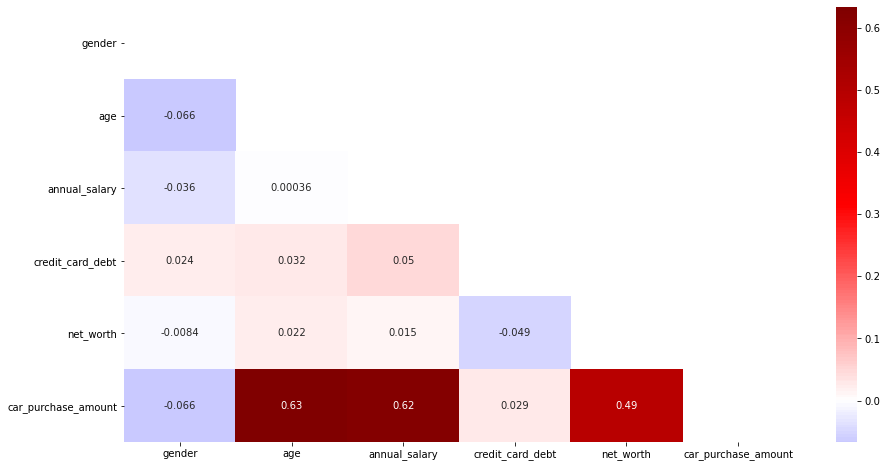

In [77]:
fig, ax = plt.subplots(figsize=(15, 8))

mask=np.zeros_like(new_data.corr())
mask[np.triu_indices_from(mask)]=True

sns.heatmap(new_data.corr(),  # the data for the heatmap
            mask=mask,  # "deactivates" all fields in our heatmap according to the mask
            annot=True,  # show the actual values of correlation
            cmap='seismic',  # provide the 'seismic' colormap
            center=0,  # specify the value at which to center the colormap
           )
plt.show()

#### 03 - Pre-Processing Data

In [19]:
x = new_data[['annual_salary']]
y = new_data[['car_purchase_amount']]

In [20]:
x

,annual_salary
0,62812.0930
1,66646.8929
2,53798.5511
3,79370.0380
4,59729.1513
...,...
495,71942.4029
496,56039.4979
497,68888.7780
498,49811.9906


In [21]:
y

,car_purchase_amount
0,35321.4588
1,45115.5257
2,42925.7092
3,67422.3631
4,55915.4625
...,...
495,48901.4434
496,31491.4146
497,64147.2889
498,45442.1535


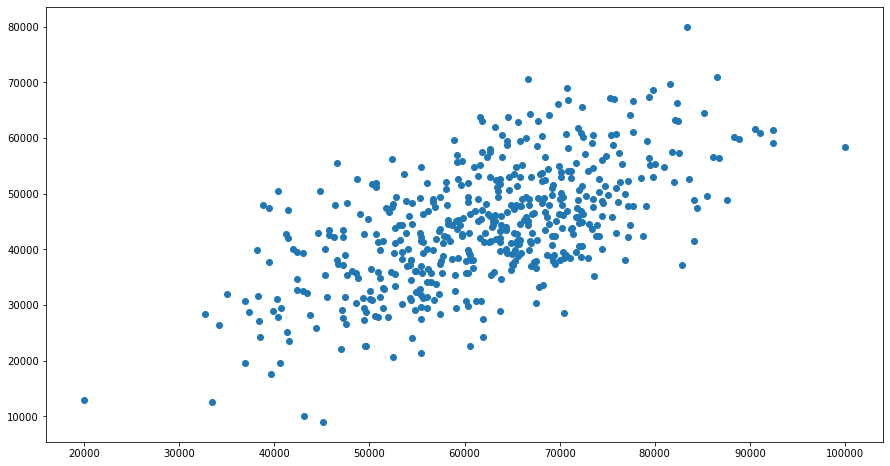

In [78]:
plt.figure(figsize=(15,8))
plt.ticklabel_format(axis='y', style='plain')
plt.scatter(x, y)

In [99]:
#step 7 split the data into train and test randomly, as a %
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

In [101]:
#step 8 apply the machine learn model for It3 
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.9994740311363091

In [113]:
x = new_data[['gender', 'age', 'annual_salary', 'credit_card_debt', 'net_worth']]
y = new_data['car_purchase_amount']

In [114]:
model1 = sm.OLS(y, x).fit()

In [115]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     car_purchase_amount   R-squared (uncentered):                   0.989
Model:                             OLS   Adj. R-squared (uncentered):              0.989
Method:                  Least Squares   F-statistic:                              8703.
Date:                 Fri, 04 Jun 2021   Prob (F-statistic):                        0.00
Time:                         01:02:24   Log-Likelihood:                         -4950.3
No. Observations:                  500   AIC:                                      9911.
Df Residuals:                      495   BIC:                                      9932.
Df Model:                            5                                                  
Covariance Type:             nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
gender           -1683.3800    428.393     -3.930      0.000   -2525.072    -841.688
age                441.4307     20.525     21.507      0.000     401.104     481.757
annual_salary        0.3161      0.015     21.170      0.000       0.287       0.345
credit_card_debt    -0.3739      0.060     -6.226      0.000      -0.492      -0.256
net_worth            0.0212      0.001     17.635      0.000       0.019       0.024
==============================================================================
Omnibus:                        0.487   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.784   Jarque-Bera (JB):                0.315
Skew:                           0.013   Prob(JB):                        0.854
Kurtosis:                       3.120   Cond. No.                     9.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### MSE

In [102]:
mse = mean_squared_error(y_test, predictions)
print(mse)

61795.88223769099


#### RMSE 

In [103]:
r2 = r2_score(y_test, predictions)
r2

0.9994740311363091

#### The adjusted R-squared

In [105]:
n= len(X_test) 
p = X_test.shape[1]

In [106]:
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.9994604752377603